In [1]:
from google.colab import drive

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [3]:
dataset = pd.read_excel("/content/CRPA_DATASET_FINAL.xlsx")

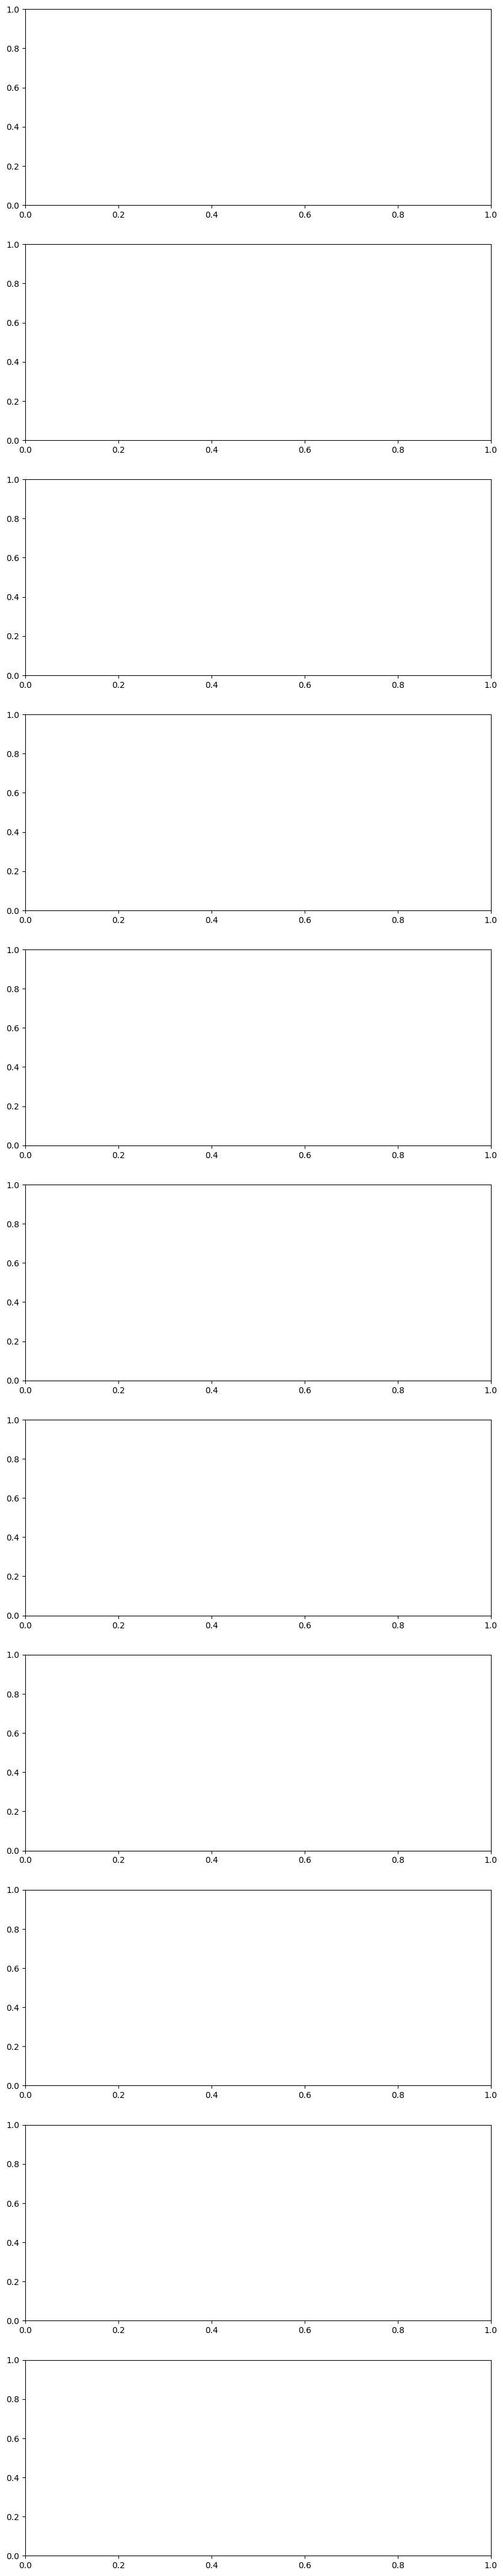

In [ ]:
# Define the number of subplots based on available numerical columns
num_plots = len(dataset.columns) - 4  # Excluding the first four columns

# Create subplots
fig, ax = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

# Plot each numerical column against STATE/UT
#for i in range(num_plots):
#    col_name = dataset.columns[i + 4]  # Skip the first four columns
#    ax[i].barh(dataset['STATE/UT'], dataset[col_name], color='Salmon')
#    ax[i].set_title(f'STATE/UT vs {col_name}')
#    ax[i].set_xlabel(col_name)
#    ax[i].set_ylabel('STATE/UT')
#    ax[i].grid(axis='x', linestyle='--', alpha=0.7)
#
#plt.tight_layout()
#plt.show()

In [4]:
print(dataset.info())
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9397 entries, 0 to 9396
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   YEAR                         9397 non-null   int64  
 1   STATE/UT                     9397 non-null   object 
 2   DISTRICT                     9397 non-null   object 
 3   POPULATION                   9397 non-null   float64
 4   RAPE                         9397 non-null   int64  
 5   KIDNAPPING &
ABDUCTION       9397 non-null   int64  
 6   BURGLARY                     9397 non-null   int64  
 7   THEFT                        9397 non-null   int64  
 8   TOTAL
IPC CRIMES             9397 non-null   int64  
 9   DACOITY 
AND ROBBERY         9397 non-null   int64  
 10  TOTAL CRIMES 
AGAINST WOMEN  9397 non-null   int64  
 11  TOTAL 
FINANCIAL CRIMES      9397 non-null   int64  
 12  TOTAL 
NEGLIGENCE CASES      9397 non-null   int64  
 13  TOTAL 
HOMICIDE CA

,0
YEAR,0
STATE/UT,0
DISTRICT,0
POPULATION,0
RAPE,0
KIDNAPPING &\nABDUCTION,0
BURGLARY,0
THEFT,0
TOTAL\nIPC CRIMES,0
DACOITY \nAND ROBBERY,0


NEW DATASET CREATION


In [5]:
# Create a new DataFrame
CRPA_NEW = pd.DataFrame(columns=['YEAR', 'STATE/UT','DISTRICT','POPULATION', 'Number Of Cases', 'Type'])

# Iterate through relevant columns to reshape the data
for i in range(4, len(dataset.columns)):
    # Use the correct column name from the dataset
    temp = dataset[['YEAR','STATE/UT','DISTRICT','POPULATION']].copy()
    temp['Number Of Cases'] = dataset[dataset.columns[i]]
    temp['Type'] = dataset.columns[i]

    CRPA_NEW = pd.concat([CRPA_NEW, temp], ignore_index=True)
CRPA_NEW.head()


<ipython-input-5-ab0f94b85e45>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  CRPA_NEW = pd.concat([CRPA_NEW, temp], ignore_index=True)


,YEAR,STATE/UT,DISTRICT,POPULATION,Number Of Cases,Type
0,2013,andhra pradesh,adilabad,528.5,122,RAPE
1,2013,andhra pradesh,anantapur,528.5,56,RAPE
2,2013,andhra pradesh,chittoor,528.5,62,RAPE
3,2013,andhra pradesh,cuddapah,528.5,38,RAPE
4,2013,andhra pradesh,cyberabad,528.5,276,RAPE


In [6]:
CRPA_NEW.to_excel("CRPA_NEW.xlsx",index = False)

In [7]:
# Group by STATE/UT to sum total cases across all districts
statewise_cases = CRPA_NEW.groupby(['YEAR', 'STATE/UT','Type'])['Number Of Cases'].sum().reset_index()

# Merge with unique state population data
state_population = CRPA_NEW[['YEAR', 'STATE/UT', 'POPULATION']].drop_duplicates()

# Merge the summed cases with population data
statewise_crime_rate = statewise_cases.merge(state_population, on=['YEAR', 'STATE/UT'])

# Calculate Crime Rate: Total Cases / Total Population of the State
statewise_crime_rate['Crime Rate'] = statewise_crime_rate['Number Of Cases'] / statewise_crime_rate['POPULATION']
statewise_crime_rate.drop(columns = ['POPULATION'],axis=1,inplace=True)
# Display the result
statewise_crime_rate

,YEAR,STATE/UT,Type,Number Of Cases,Crime Rate
0,2001,andaman and nicobar islands,BURGLARY,64,16.0
1,2001,andaman and nicobar islands,DACOITY \nAND ROBBERY,4,1.0
2,2001,andaman and nicobar islands,KIDNAPPING &\nABDUCTION,4,1.0
3,2001,andaman and nicobar islands,RAPE,6,1.5
4,2001,andaman and nicobar islands,THEFT,130,32.5
...,...,...,...,...,...
5000,2013,west bengal,TOTAL \nFINANCIAL CRIMES,8097,8.237868
5001,2013,west bengal,TOTAL \nHOMICIDE CASES,6202,6.309899
5002,2013,west bengal,TOTAL \nNEGLIGENCE CASES,74790,76.091159
5003,2013,west bengal,TOTAL \nVIOLENT CRIMES,25277,25.716757


In [8]:
statewise_crime_rate = statewise_crime_rate.drop(['Number Of Cases'], axis=1)
statewise_crime_rate

,YEAR,STATE/UT,Type,Crime Rate
0,2001,andaman and nicobar islands,BURGLARY,16.0
1,2001,andaman and nicobar islands,DACOITY \nAND ROBBERY,1.0
2,2001,andaman and nicobar islands,KIDNAPPING &\nABDUCTION,1.0
3,2001,andaman and nicobar islands,RAPE,1.5
4,2001,andaman and nicobar islands,THEFT,32.5
...,...,...,...,...
5000,2013,west bengal,TOTAL \nFINANCIAL CRIMES,8.237868
5001,2013,west bengal,TOTAL \nHOMICIDE CASES,6.309899
5002,2013,west bengal,TOTAL \nNEGLIGENCE CASES,76.091159
5003,2013,west bengal,TOTAL \nVIOLENT CRIMES,25.716757


In [9]:
final_set = pd.DataFrame(statewise_crime_rate)
final_set

,YEAR,STATE/UT,Type,Crime Rate
0,2001,andaman and nicobar islands,BURGLARY,16.0
1,2001,andaman and nicobar islands,DACOITY \nAND ROBBERY,1.0
2,2001,andaman and nicobar islands,KIDNAPPING &\nABDUCTION,1.0
3,2001,andaman and nicobar islands,RAPE,1.5
4,2001,andaman and nicobar islands,THEFT,32.5
...,...,...,...,...
5000,2013,west bengal,TOTAL \nFINANCIAL CRIMES,8.237868
5001,2013,west bengal,TOTAL \nHOMICIDE CASES,6.309899
5002,2013,west bengal,TOTAL \nNEGLIGENCE CASES,76.091159
5003,2013,west bengal,TOTAL \nVIOLENT CRIMES,25.716757


In [10]:
final_set.to_excel("crpas_final.xlsx",index = False)

LOAD NEW DATASET

In [35]:
df = pd.read_excel("crpas_final.xlsx")

LABEL ENCODING


In [62]:
state_encoder = LabelEncoder()
df['STATE/UT'] = state_encoder.fit_transform(df['STATE/UT'])
df

,YEAR,STATE/UT,Type,Crime Rate
0,2001,0,0,16.000000
1,2001,0,1,1.000000
2,2001,0,2,1.000000
3,2001,0,3,1.500000
4,2001,0,4,32.500000
...,...,...,...,...
5000,2013,34,6,8.237868
5001,2013,34,7,6.309899
5002,2013,34,8,76.091159
5003,2013,34,9,25.716757


In [63]:
crime_encoder = LabelEncoder()
df['Type'] = crime_encoder.fit_transform(df['Type'])
df

,YEAR,STATE/UT,Type,Crime Rate
0,2001,0,0,16.000000
1,2001,0,1,1.000000
2,2001,0,2,1.000000
3,2001,0,3,1.500000
4,2001,0,4,32.500000
...,...,...,...,...
5000,2013,34,6,8.237868
5001,2013,34,7,6.309899
5002,2013,34,8,76.091159
5003,2013,34,9,25.716757


In [14]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [17]:
X_train

array([[-0.27045691, -1.07817539,  0.9436942 ],
       [-1.33946923, -0.19097588,  1.25949458],
       [-0.00320383,  0.79480136, -0.9511081 ],
       ...,
       [-0.53770999, -0.68386449, -0.63530771],
       [-0.00320383,  0.99195681, -1.58270886],
       [ 0.26404925, -1.37390856, -0.31950733]])

In [18]:
y_train

array([72.55994596, 12.98395445,  3.49858048, ...,  2.56410256,
        8.60526316, 45.5745165 ])

RANDOM FOREST

In [23]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [24]:
import numpy as np

In [25]:
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)), axis=1)

array([[  9.51728011,  10.43478261],
       [ 29.76164092,  21.50621118],
       [  1.86408468,   2.80810355],
       ...,
       [156.16159299, 167.78688525],
       [  9.44102411,  19.37253799],
       [  5.35515319,   6.42857143]])

In [26]:
model.score(X_test,y_test)

0.9650927565632913

In [29]:
year = int(input("enter the year:"))
state = input("enter the state:")
crime_type = input("enter the type of crime:")

if state not in le.classes_:
    print(f"Error: '{state}' is not in the trained dataset. Available states: {list(le.classes_)}")
    exit()

if crime_type not in le2.classes_:
    print(f"Error: '{crime_type}' is not in the trained dataset. Available crime types: {list(le2.classes_)}")
    exit()

def predict_result(year,state,crime_type):
    state_encoded = le.transform([state])[0]
    crime_type_encoded = le2.transform([crime_type])[0]
    input_data = np.array([[year,state_encoded,crime_type_encoded]])
    return model.predict(input_data)
print(predict_result(year,state,crime_type))

enter the year:2027
enter the state:kerala
enter the type of crime:RAPE
[20.49598973]


In [91]:
pip install tensorflow

In [109]:
import joblib
import pickle
from prophet import Prophet
import pandas as pd
import os

def train_and_save_model(data, state_name, crime_type):
    """
    Train the model and save it for specific state and crime type
    """
    def get_state_mapping():
      state_names = [
        'andaman and nicobar islands', 'andhra pradesh', 'arunachal pradesh',
        'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'dadra and nagar haveli',
        'daman and diu', 'delhi', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
        'jammu and kashmir', 'jharkhand', 'karnataka', 'kerala', 'lakshadweep',
        'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
        'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu',
        'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal'
    ]
      return {name: i for i, name in enumerate(state_names)}  # Reversed mapping

def get_crime_mapping():
    crime_types = [
        'BURGLARY', 'DACOITY AND ROBBERY', 'KIDNAPPING & ABDUCTION', 'RAPE',
        'THEFT', 'TOTAL IPC CRIMES', 'TOTAL FINANCIAL CRIMES',
        'TOTAL HOMICIDE CASES', 'TOTAL NEGLIGENCE CASES',
        'TOTAL VIOLENT CRIMES', 'TOTAL CRIMES AGAINST WOMEN'
    ]
    return {name: i for i, name in enumerate(crime_types)}  # Reversed mapping
    # Get state and crime codes
    state_mapping = get_state_mapping()
    crime_mapping = get_crime_mapping()

    state_code = state_mapping[state_name.lower()]
    crime_code = crime_mapping[crime_type.upper()]

    # Filter data
    df = data[
        (data['STATE/UT'] == state_code) &
        (data['Type'] == crime_code)
    ].copy()

    # Prepare data for Prophet
    df_prophet = pd.DataFrame({
        'ds': pd.to_datetime(df['YEAR'].astype(str)),
        'y': df['Crime Rate']
    })

    # Create and train model
    model = Prophet(
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=10.0,
        changepoint_range=0.9,
        n_changepoints=8,
        yearly_seasonality=True,
        interval_width=0.95
    )

    model.add_seasonality(
        name='custom',
        period=5,
        fourier_order=3
    )

    model.fit(df_prophet)

    # Create directory for models if it doesn't exist
    os.makedirs('saved_models', exist_ok=True)

    # Save the model


def train_all_models(data):
    """
    Train and save models for all state and crime type combinations
  """

    def get_state_mapping():
      state_names = [
        'andaman and nicobar islands', 'andhra pradesh', 'arunachal pradesh',
        'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'dadra and nagar haveli',
        'daman and diu', 'delhi', 'goa', 'gujarat', 'haryana', 'himachal pradesh',
        'jammu and kashmir', 'jharkhand', 'karnataka', 'kerala', 'lakshadweep',
        'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
        'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu',
        'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal'
    ]
      return {name: i for i, name in enumerate(state_names)}  # Reversed mapping

    def get_crime_mapping():
      crime_types = [
        'BURGLARY', 'DACOITY AND ROBBERY', 'KIDNAPPING & ABDUCTION', 'RAPE',
        'THEFT', 'TOTAL IPC CRIMES', 'TOTAL FINANCIAL CRIMES',
        'TOTAL HOMICIDE CASES', 'TOTAL NEGLIGENCE CASES',
        'TOTAL VIOLENT CRIMES', 'TOTAL CRIMES AGAINST WOMEN'
    ]
      return {name: i for i, name in enumerate(crime_types)}
      state_mapping = get_state_mapping()
      crime_mapping = get_crime_mapping()

      saved_models = {}

      for state_name in state_mapping.keys():
        for crime_type in crime_mapping.keys():
            try:
                model_filename = train_and_save_model(data, state_name, crime_type)
                saved_models[(state_name, crime_type)] = model_filename
                print(f"Saved model for {state_name.title()} - {crime_type}")
            except Exception as e:
                print(f"Error saving model for {state_name.title()} - {crime_type}: {str(e)}")

    # Save the mapping of models
      with open('saved_models/model_mapping.pkl', 'wb') as f:
          pickle.dump(saved_models, f)

      return saved_models

# Train and save all models
saved_models = train_all_models(df)